# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/justmarkham/DAT4-students/blob/master/kerry/Final/NBA_players_2015.csv), [data dictionary](https://github.com/justmarkham/DAT-project-examples/blob/master/pdf/nba_paper.pdf)
- **Goal:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [4]:
# read the data into a DataFrame
import pandas as pd
nba = pd.read_csv('data/NBA_players_2015.csv', index_col=0)
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [5]:
# examine the columns
nba.columns

Index([u'season_end', u'player', u'pos', u'age', u'bref_team_id', u'g', u'gs',
       u'mp', u'fg', u'fga', u'fg_', u'x3p', u'x3pa', u'x3p_', u'x2p', u'x2pa',
       u'x2p_', u'ft', u'fta', u'ft_', u'orb', u'drb', u'trb', u'ast', u'stl',
       u'blk', u'tov', u'pf', u'pts', u'G', u'MP', u'PER', u'TS%', u'3PAr',
       u'FTr', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'OWS',
       u'DWS', u'WS', u'WS/48', u'OBPM', u'DBPM', u'BPM', u'VORP'],
      dtype='object')

In [6]:
# examine the positions
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [28]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})
nba[['pos','pos_num']].head()

,pos,pos_num
0,F,1
1,G,2
2,C,0
3,F,1
4,G,2


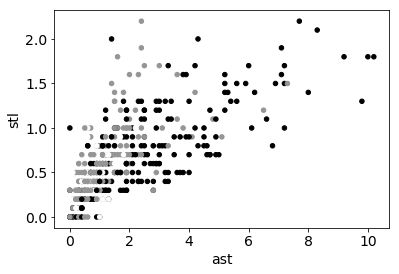

In [29]:
nba.plot('ast', 'stl', kind='scatter', c=nba.pos_num)

In [8]:
# create feature matrix (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [9]:
# alternative way to create X
X = nba.loc[:, 'ast':'pf']

In [10]:
# create response vector (y)
y = nba.pos_num

## Step 3: Train a KNN model (K=5)

In [11]:
# import class
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# instantiate with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
# fit with data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
knn.score(X, y)

0.66527196652719667

In [33]:
from sklearn import grid_search, cross_validation, neighbors, metrics
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
k = range(2, 33)
params = {'n_neighbors': k }
kf = cross_validation.KFold(len(nba), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(X, y)
gs.grid_scores_

[mean: 0.60042, std: 0.05395, params: {'n_neighbors': 2},
 mean: 0.59414, std: 0.03778, params: {'n_neighbors': 3},
 mean: 0.63598, std: 0.04588, params: {'n_neighbors': 4},
 mean: 0.65900, std: 0.02803, params: {'n_neighbors': 5},
 mean: 0.65481, std: 0.03545, params: {'n_neighbors': 6},
 mean: 0.66109, std: 0.03177, params: {'n_neighbors': 7},
 mean: 0.64854, std: 0.03503, params: {'n_neighbors': 8},
 mean: 0.64435, std: 0.02877, params: {'n_neighbors': 9},
 mean: 0.65481, std: 0.04309, params: {'n_neighbors': 10},
 mean: 0.65690, std: 0.04300, params: {'n_neighbors': 11},
 mean: 0.66318, std: 0.03832, params: {'n_neighbors': 12},
 mean: 0.65900, std: 0.02791, params: {'n_neighbors': 13},
 mean: 0.66736, std: 0.03074, params: {'n_neighbors': 14},
 mean: 0.65900, std: 0.02407, params: {'n_neighbors': 15},
 mean: 0.66109, std: 0.02293, params: {'n_neighbors': 16},
 mean: 0.67364, std: 0.01533, params: {'n_neighbors': 17},
 mean: 0.66527, std: 0.02536, params: {'n_neighbors': 18},
 mean

## Step 4: Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [14]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [15]:
# make a prediction
knn.predict(player)

/Users/bear/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [16]:
# calculate predicted probabilities
knn.predict_proba(player)

/Users/bear/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [17]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)
knn.predict(player)

/Users/bear/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [18]:
# calculate predicted probabilities
knn.predict_proba(player)

/Users/bear/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.06,  0.62,  0.32]])

## Bonus: Explore the features to decide which ones are predictive

In [19]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [20]:
# description of assists grouped by position
nba.groupby('pos').ast.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
pos,,,,,,,,
C,79.0,0.945570,0.858263,0.0,0.40,0.80,1.15,4.4
F,199.0,1.173367,1.086252,0.0,0.45,0.90,1.50,7.3
G,200.0,2.729000,2.128287,0.0,1.10,2.25,3.80,10.2


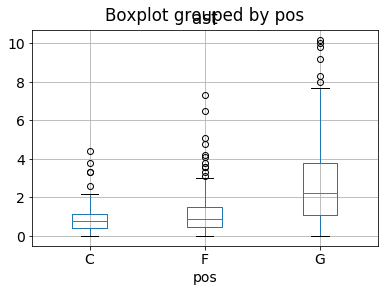

In [21]:
# box plot of assists grouped by position
nba.boxplot(column='ast', by='pos')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116d240d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116fd7a90>]], dtype=object)

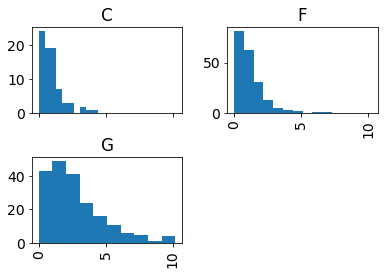

In [22]:
# histogram of assists grouped by position
nba.hist(column='ast', by='pos', sharex=True)